# [Youtube] Deep Learning With PyTorch - Full Course

__Context__:  Aggregated Intellect 的 Recsys Study Group 用的是 Pytorch, 那我就快速学个入门和 API. 

这个是整个 4 hour video
- https://www.youtube.com/watch?v=c36lUUr864M

这里有个按 section 分好的 playlist: 
- https://www.youtube.com/watch?v=DbeIqrwb_dE&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=3

### 01 - Installation

https://pytorch.org/

因为我是 mac， 所以没有 CUDA 也就是 GPA 版本..

视频里是说 create 一个 virtualenv:
- conda create -n pytorch python=3.7
- conda activate pytorch

De-activate 用这个: 
- conda deactivate

然后再来 install: 
- conda install pytorch torchvision torchaudio -c pytorch

--------------------------------

### 02 - Tensor Basics

In [3]:
import torch

# Everything in pytorch is based on Tensor operations.
# A tensor can have different dimensions
# so it can be 1d, 2d, or even 3d and higher

# scalar, vector, matrix, tensor

# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print(x)
x = torch.empty(3) # vector, 1D
print(x)
x = torch.empty(2,3) # matrix, 2D
print(x)
x = torch.empty(2,2,3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print(x)

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print(x)

# check size
print(x.size())

# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

# construct from data。
# 这个应该比较有用？？
x = torch.tensor([5.5, 3])
print(x.size())

# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)

# Operations
y = torch.rand(2, 2)
x = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable。 哦，这个还挺重要的!!! 这个跟上面torch.add(x,y)不同的是，
# 这个会改变 y  里面存的数值
# y.add_(x)

# substraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y
z = torch.div(x,y)

# Slicing
x = torch.rand(5,3)
print(x)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # row 1, all columns
print(x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
# 不然会 print  tensor(内容..) 而不是直接就是内容. 这个他说是只有一个 element 才可以用？
print(x[1,1].item())

# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16) # 改成 1-d 的 16 个 item 的

# the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
# 这个方便，也就是我不用写 (2,8) 直接写 -1 然后 pyTorch 会知道其他的用总 dimension 去算
z = x.view(-1, 8)  

print(x.size(), y.size(), z.size())

# Numpy Converting a Torch Tensor to a NumPy array and vice versa is very easy
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
# 这个就是把 tensor array 转成 numpy array 明白
b = a.numpy()
print(b)
print(type(b)) #如果是在 cpu 那么a 和 b 会在同一个 address/memory location wow...

# (这个就是我上面说的👆🏼) Carful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

# numpy to torch with .from_numpy(x)
# 这里是把  numpy array 转成 torch 的 tensor array
# question: 这个会 share memory location 吗？answer: 会的
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

# again be careful when modifying。 就是这个会 share memory location
a += 1
print(a)
print(b)

# by default all tensors are created on the CPU, 这边就是教怎么create tensor in GPU
# but you can also move them to the GPU (only if it's available. Mac 没有这个)
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tenors. 原来还有这个?
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()

    
    

tensor([1.1578e+27])
tensor([-3.4381e+10,  8.5920e+09, -3.4380e+10])
tensor([[ 3.6893e+19,  3.2001e+01,  1.6816e-44],
        [ 0.0000e+00, -3.4382e+10, -2.0005e+00]])
tensor([[[2.0000e+00, 4.5417e+03, 0.0000e+00],
         [2.7551e-40, 5.5670e-13, 1.4013e-45]],

        [[0.0000e+00, 0.0000e+00, 1.4013e-45],
         [0.0000e+00, 0.0000e+00, 2.2369e+08]]])
tensor([[0.5870, 0.8432, 0.5570],
        [0.7170, 0.6479, 0.9562],
        [0.5817, 0.2405, 0.3752],
        [0.0629, 0.5731, 0.6416],
        [0.2752, 0.5796, 0.4895]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16
torch.Size([2])
tensor([[0.8779, 0.5759, 0.4790],
        [0.5353, 0.5997, 0.3140],
        [0.3173, 0.5792, 0.2308],
        [0.7650, 0.8422, 0.6121],
        [0.2626, 0.1049, 0.

In [8]:
# 这个是说如果你之后需要去 optimize 这个 tensor 那么就会需要 grandient， 那么你就要 specify
# 这个下一课会讲
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


------------------
### 03 - Autograd

grad 这里指的是 gradient. 

<font color='red'>Question</font>: gradient 是啥意思？跟 derivative 啥区别？

<font color='green'>Answer</font>:
- 我们之前学求导的 derivative 也就是最大斜率，只是 dy/dx,  也就是只有一个变量 x 的时候， 这个时候大小很好找
- 但是如果我们有两个变了，比如 f(x,y) 的时候，就要用求偏导，但是求偏导数是要固定其他变量，这样还是不能回答我往哪里走能找到最大斜率，也就是 f(x,y) 的梯度
- 梯度的提出只为回答一个问题：函数在变量空间的某一点处，沿着哪一个方向有最大的变化率？
- 梯度定义如下：函数在某一点的梯度是这样一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。
- 这边有个解释，说一元函数的梯度，就是在 x 轴上. [link](https://www.zhihu.com/question/36301367).
- reference: 
    - https://www.zhihu.com/question/36301367
    - https://www.zhihu.com/question/29151564


<img src="img/backpropagation.png" width=300 height=300 />


In [18]:
import torch
# The autograd package provides automatic differentiation 
# for all operations on Tensors

# requires_grad = True -> tracks all operations on the tensor. 
x = torch.randn(3, requires_grad=True)
y = x + 2 #this will create a computational graph of how y is derived


# y was created as a result of an operation, so it has a grad_fn attribute.
print(x) # created by the user -> grad_fn is None
print(y)
# grad_fn: references a Function that has created the Tensor
print(y.grad_fn)

tensor([0.3267, 0.5994, 0.6460], requires_grad=True)
tensor([2.3267, 2.5994, 2.6460], grad_fn=<AddBackward0>)


In [19]:

# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)


tensor([16.2411, 20.2711, 21.0040], grad_fn=<MulBackward0>)
tensor(19.1721, grad_fn=<MeanBackward0>)


In [20]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor
# 也就是要先 call backward() trigger 去算 gradient， 然后才能从 x.grad 来得到gradient
z.backward()
# 这个就可以显示 gradient 

# Question: 这个 tensor([4.6535, 5.1989, 5.2920]) 啥意思？是说这个方向是 gradient??
# 他说这个会通过一个 vector jacobian 来得到 gradient?? 这个下一个课会讲...
print(x.grad) # dz/dx

tensor([4.6535, 5.1989, 5.2920])



Generally speaking, torch.autograd is an engine for computing vector-Jacobian product. It computes partial derivates while applying the chain rule

Model with non-scalar output:

- If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() specify a gradient argument that is a tensor of matching shape. needed for vector-Jacobian product

In [25]:
# 这边听的一头雾水.... 😅 总之就是，如果你的 output 是 scalar output
# 比如只有一个数的，比如上面的 z = z.mean() 就没关系，不然你得给 backward()
# 里面传一个同 dimension 的 vector 才行?? 原因我也不太懂，就是上面说的 jacobian product??

z = y*y*2
# 这个 v 就是上面说的，如果 z 不是一个 scalar，那么就要传一个同size 的 vector 进去
v = torch.tensor([0.1,0.01,0.001], dtype=torch.float32) 
z.backward(v)
print(x.grad)

tensor([6.5149, 5.4068, 5.3132])


__Stop a tensor from tracking history:__

For example during our training loop when we want to update our weights
then this update operation should not be part of the gradient computation
- x.requires_grad_(False)
- x.detach()
- wrap in 'with torch.no_grad():'

不是很懂什么意思，就是说有时候，我不需要这个 gradient computation 一直跟着我们的运算，那么就有上面基过方法可以拿掉？


In [30]:
# Option1: 直接 in-place 改
x.requires_grad_(False)
print(x)

# Option2: 这个会 create a new tensor with same value 但是没有 gradient
y = x.detach() 
print(y)

# Option3: 用 torch.no_grad()
with torch.no_grad():
    y = x + 2
    print(y)

tensor([0.3267, 0.5994, 0.6460])
tensor([0.3267, 0.5994, 0.6460])
tensor([2.3267, 2.5994, 2.6460])


下面这里就是讲如何处理多次 call .backward() 会 accumulate 然后要怎么zero out

backward() accumulates the gradient for this tensor into .grad attribute.

!!! We need to be careful during optimization !!!

Use .zero_() to empty the gradients before a new optimization step!

后面 05 - Gradient Descent with Autograd and Backpropagation 手写 linear regression 的时候，还会讲到这个!!

In [37]:
weights = torch.ones(3, requires_grad = True)
print(weights)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward() # 这个是多次 call 会 accumulate的
    
    print(weights.grad)
    
    # 由于上面 backward() 会 accumulate 到 graidient 我们这里才要 zero out 如果我们是要
    # 算三次独立的
    weights.grad.zero_() 

tensor([1., 1., 1.], requires_grad=True)
tensor([3., 3., 3.])
tensor([3., 3., 3.])
tensor([3., 3., 3.])


In [38]:
# 同理， optimization func 也是一样. 后面会讲..
# Optimizer has zero_grad() method
# optimizer = torch.optim.SGD([weights], lr=0.1)
# During training:
# optimizer.step()
# optimizer.zero_grad()

--------------------
### 04 - Backpropagation

这个明天看吧。.. 笔记写在这里：
https://docs.google.com/document/d/1PpDqR2x7c6yH7o4noXZWcn_GV6J65JiW0wnzwVLQeoA/edit#bookmark=id.3cqru6s9vj9l

In [41]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad) # 这边如同笔记里一样，应该是要 print -2

# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

### 05 - Gradient Descent with Autograd and Backpropagation


这边一上来，就是先手写一个简单的 linear regression

In [45]:
import numpy as np 

# Compute every step manually
# 这边是不用 library 直接手写一个 Linear Regression

# Linear regression
# f = w * x 

# here : f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

# initialized weight
w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE = 1/N * (w*x - y)**2
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# 这里是手动算 gradient
# J = MSE = 1/N * (w*x - y)**2    J 这里是 Objective function
# dJ/dw = 1/N * 2 * x * (w*x - y)      这里是 对 w partial 求导, 个需要 chain rule, 
#  可以用这个自己试一下: https://www.symbolab.com/solver/partial-derivative-calculator    
def gradient(x, y, y_pred):
    # dot 这里是指 dot product. 但是为啥要 dot product?? 因为是两个vector的item , item 相乘!
    # 这里用 .mean() 是对应上面的 1/N
    return np.dot(2*x, y_pred - y).mean() 

In [46]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [48]:
# Training
# 这个就是走的步子, 然后后面要 w -= learning_rate * dw 这样来做 gradient descent, 
# 也就是往 gradient ascentd 的反方向走. dw 这里就是 gradient
learning_rate = 0.01 
n_iters = 20

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X) # 注意这里传进去的是 vector 

    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    # 发现没有，这里本质上就是往里传  input, output, output_pred
    # 然后算出，在目前 这个model下 (只有一个feature w)，我们的在每个 input 位置上的
    # partial derivative of Loss with respect to w 是多少，这个点反方向，就是
    # 我们要 w 去试探的方向
    dw = gradient(X, Y, y_pred)

    # update weights。 这里就是 gradient descent 的地方. dw 是 gradient ascend
    # 也就是让你的 objective function 的值变大的方向，那么你往回减，就是变小的方向，
    # 就是你要 learning 走的方向
    w -= learning_rate * dw

    # 每两步都 print 一下
    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')
# 哇，这个出来的结果还是挺准的

epoch 1: w = 2.000, loss = 0.00000000
epoch 3: w = 2.000, loss = 0.00000000
epoch 5: w = 2.000, loss = 0.00000000
epoch 7: w = 2.000, loss = 0.00000000
epoch 9: w = 2.000, loss = 0.00000000
epoch 11: w = 2.000, loss = 0.00000000
epoch 13: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


___接下来用 pytorch 来弄. 注意跟上面对比!!___

In [51]:
import torch

# Here we replace the manually computed gradient with autograd

# Linear regression
# f = w * x 

# here : f = 2 * x
# 这边跟上面对比，就是把 data type 改了一下
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward() # 算出 dLoss / dw, 

    # update weights
    #w.data = w.data - learning_rate * w.grad
    
    # Question: 为啥要用 .no_grad?? 
    # Answer: 哦，因为这个不能是 computation graph 也就是我们这里对 w 的改动，
    # 跟我们要算的  l = (y_hat-y)^2 / N = (x*w - y)^2 / N 这个无关 
    # 所以需要 .no_grad, 不然这个改动，也会被 .backward() 给包括进去
    with torch.no_grad():
        # print 出来看下长啥样？
        gradient = w.grad
        print(f'gradient: {gradient}')
        w -= learning_rate * gradient
    
    # zero the gradients after updating
    # 不然会 每次算 w.grad 会 accumulate accumulate，我们不需要 epoch 之间 
    # gradient 有关联
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000
gradient: -30.0
epoch 1: w = 0.300, loss = 30.00000000
gradient: -25.5
gradient: -21.674999237060547
gradient: -18.423751831054688
gradient: -15.660187721252441
gradient: -13.311159133911133
gradient: -11.314485549926758
gradient: -9.61731243133545
gradient: -8.174715042114258
gradient: -6.948507308959961
gradient: -5.90623140335083
epoch 11: w = 1.665, loss = 1.16278565
gradient: -5.020296096801758
gradient: -4.267251491546631
gradient: -3.627163887023926
gradient: -3.0830883979797363
gradient: -2.6206254959106445
gradient: -2.2275314331054688
gradient: -1.8934016227722168
gradient: -1.609391689300537
gradient: -1.3679819107055664
gradient: -1.1627840995788574
epoch 21: w = 1.934, loss = 0.04506890
gradient: -0.9883670210838318
gradient: -0.8401127457618713
gradient: -0.7140950560569763
gradient: -0.6069803237915039
gradient: -0.5159334540367126
gradient: -0.43854278326034546
gradient: -0.37276071310043335
gradient: -0.31684792041778564
gradien

### 06 - Training Pipeline: Model, Loss, and Optimizer

Typically we have 3 steps

1) Design model (input, output, forward pass with different layers) 这里 forward pass 就是指往前算结果

2) Construct loss and optimizer

3) Training loop

      - Forward = compute prediction and loss
      - Backward = compute gradients
      - Update weights 
      - (interate this some epoch time to get to the optimized weights)

In [ ]:
 ---- 这边是一个 forward() 自己 impelment 其他都是调包版的 ----- 

In [ ]:


import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
# 这边就不用像之前那样手写 loss function 了， 可以直接调包
loss = nn.MSELoss()
# 这个是之前的 implementation
# def loss(y, y_pred):
#     return ((y_pred - y)**2).mean()


# 这个是啥？ SGD 是 stochastic gradient descent
# 哦，这个就是直接代替之前 手动算 gradient 和手动update weight 的方程
# 这里直接 在 epoch 里面 call optimizer.step() 就可以update weight to gradient descent 方向了
optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    # 对应之前的  w -= learning_rate * w.grad
    optimizer.step()

    # zero the gradients after updating
    # 还是要 zero out gradient 这样 epoch 之间 gradient 的 backword chain rule 不会累加
    # 我发现有的别的例子，是写在 .backward() 之前，有的是写在之后，应该都可以，反正就是保证 epoch 之间 epoch 不累加
    # 其实写在之前估计还更安全一一点， 因为万一 for loop 之前之前有呢
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')


 ---- 这边还有一个全部都是调包版的 ----- 
 
 但是这边就是你的 x 和 y 的数据结构要稍微调整

In [73]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x 

# here : f = 2 * x

# 0) Training samples, watch the shape!
# 这里因为我们后面要直接给 pytorch API  model(X) 这么传，我们就得用
# 他们能接受的结构，比如这里是 要用 array of features 这种写法
# 然后你的  label 也是一样
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')



# 1) Design Model, the model has to implement the forward pass!
# Here we can use a built-in model from PyTorch
input_size = n_features
output_size = n_features

# we can call this model with samples X
# 这里好神奇，估计只是 initialize model vector 这个数据结构, 所以你的 feature 和target 都不用传
model = nn.Linear(input_size, output_size)

# 上面是因为 pytorch 有提供 linear regression
# 如果我们要 custom model 就得这么写
'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)
'''
# 这里就是举个例子，怎么调 model prediction， 直接把 feature 传进去就行
X_test = torch.tensor([5], dtype=torch.float32)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()

# 这边原来是长这样: torch.optim.SGD([w], lr=learning_rate) 
# 这里直接 model.parameters() 就可以
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    # 之前我是call forward(X), 但是那是一个我自己implement 的， 这里直接 call model(X) 就行
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        # 这边要 print 要 unpack 了
        # 每台搜到这里 b 是啥？他说是 bias？ 
        [w, b] = model.parameters() # unpack parameters
        
        # Question: 我咋知道 model.parameters()  长啥样？看 doc 是iterator?
        # Answer: 哦, stackoverflow 说直接转成 list print 出来就行
        #  还有个更好的办法，直接用 named_parameters, 就可以看到是啥了，真的一个是 weight, 一个是 bias
        #  print(f'list model.parameters() {list(model.named_parameters())}')
        # 得到的是 list model.parameters() [Parameter containing:tensor([[1.1851]], requires_grad=True), Parameter containing:tensor([1.3722], requires_grad=True)]
        # 但是你其实还是不知道你们是啥？
        
        
        # 这边是我尝试葱 named_parameters 里面读， 把 tensor 转成 value 要用  .item()
        # [w_named, b_named] = model.named_parameters()
        # print(w_named[1][0][0].item())
        
        # 他说 w 是 list of list??? 所以你要 [0][0]?
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

        
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')




#samples: 4, #features: 1
Prediction before training: f(5) = -2.770
0.04125487804412842
epoch  1 : w =  Parameter containing:
tensor([[0.0413]], requires_grad=True)  loss =  tensor(54.1235, grad_fn=<MseLossBackward0>)
1.7245739698410034
epoch  11 : w =  Parameter containing:
tensor([[1.7246]], requires_grad=True)  loss =  tensor(1.4035, grad_fn=<MseLossBackward0>)
1.9941632747650146
epoch  21 : w =  Parameter containing:
tensor([[1.9942]], requires_grad=True)  loss =  tensor(0.0393, grad_fn=<MseLossBackward0>)
2.0363900661468506
epoch  31 : w =  Parameter containing:
tensor([[2.0364]], requires_grad=True)  loss =  tensor(0.0038, grad_fn=<MseLossBackward0>)
2.042079448699951
epoch  41 : w =  Parameter containing:
tensor([[2.0421]], requires_grad=True)  loss =  tensor(0.0028, grad_fn=<MseLossBackward0>)
2.0419247150421143
epoch  51 : w =  Parameter containing:
tensor([[2.0419]], requires_grad=True)  loss =  tensor(0.0026, grad_fn=<MseLossBackward0>)
2.0408613681793213
epoch  61 : w =  Pa

### 07 - Linear Regression


这个就是把之前的Linear Regression, 用 datasets.make_regression 产生的数据集再做一遍

同样的步骤
 - 0) Get test data
 - 1) Define model with input and output size
 - 2) Define Loss and Optimizer function
 - 3) Training loop
     - forward path: compute prediction and compute loss
     - backward path: compute gradient
     - update weight (using the gradient)
 - 4) Predict

这里补充一个 shortcut
- switch to markdown: esc + m
- switch to code: esc + c

In [81]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
# 这边用 datasets library 来create 一个 regression dataset
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, 
    n_features=1, 
    noise=20, 
    random_state=4)


# cast to float Tensor。 因为我们上面用的是numpy
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# print(f'y: {y}')
# print(f'y.shape: {y.shape[0]}')

# reshape the y?? 因为我们要 change it to array of array with one item?
# 这个 print 出来看一下? 结合下面这个 doc 大概明白了，第一个 param 是 outer dimension, 第二个是 inner dimension
# 所以就是 100 x 1 的 tensor.  而如果你不做这个 reshape, 那么你面 y.shape 出来的是 100 而不是 100x1
# https://pytorch.org/docs/stable/generated/torch.Tensor.view.html
y = y.view(y.shape[0], 1)
# print(f'y_reshaped: {y}')

n_samples, n_features = X.shape

y: tensor([-126.2492,   50.9288,   63.1546,    6.0547,   -5.7295,   -2.7519,
          58.7036,   53.8136,  -95.3411,   24.6481,  -59.4170,  -73.4235,
        -104.1627,   31.8077,  171.1535,  -67.7520,  141.4677,  -24.3676,
          -2.1124,  -32.5958,  -29.4151,  -37.8715, -101.8983,   46.4129,
        -181.3484,  -31.7740,   24.1315,  163.9438,   10.7737,   37.3589,
           0.9804, -120.8857,  138.1994,    9.2027,  -16.2069,   33.2171,
         -45.6170,   -1.7776, -105.5628,    5.2639,   89.5979,  146.1030,
         -77.7870,   -3.8089,   60.8120,  -97.2027,   -1.1599,  -43.8825,
          15.7428,  -24.2745,  -90.6015,  -19.0731, -101.7900,  -56.5514,
          52.1697, -158.2847,   64.5397,   84.5210,   66.4343,   36.8660,
          37.4378,  -82.9171,  -21.4183,   -5.5435,   59.8845,    8.3785,
         -17.1763, -160.5090, -100.7372,   80.3034,   69.6496,   28.1444,
           9.7630,   41.1250,  176.9283,    9.5598,   -4.4046,  -24.0359,
          19.1701,  102.4833,  101.

In [83]:


# 1) Define Model with input output size and what model to use
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Define Loss func and optimizer func
learning_rate = 0.01

loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = loss_func(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 3988.2329
epoch: 20, loss = 2812.8938
epoch: 30, loss = 2011.4481
epoch: 40, loss = 1464.8413
epoch: 50, loss = 1091.9650
epoch: 60, loss = 837.5514
epoch: 70, loss = 663.9311
epoch: 80, loss = 545.4246
epoch: 90, loss = 464.5212
epoch: 100, loss = 409.2795


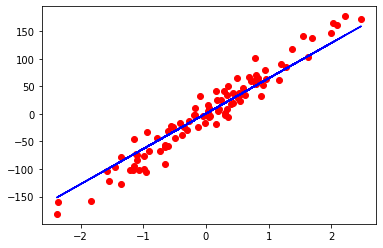

In [84]:
# Plot
# .detach() tensor to prevent this being add to computation graph
# 然后转成 numpy() 来 plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### 08 - Logistic Regression


同样的步骤
 - 0) Get test data
 - 1) Define model with input and output size
 - 2) Define Loss and Optimizer function
 - 3) Training loop
     - forward path: compute prediction and compute loss
     - backward path: compute gradient
     - update weight (using the gradient)
 - 4) Predict

In [87]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data. This is a binary classification dataset
bc = datasets.load_breast_cancer()

# 这里X 是一个 569 x 30 的 matrix, 也就是每个 sample 有 30 个 feature
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
X, y = bc.data, bc.target

# 另外查了一下 ML Glossary: Sample 和 Observation 都是 input. Target 和 Label 都是 output

n_samples, n_features = X.shape

print(f'n_samples: {n_samples}, n_features: {n_features}')

print(X)


n_samples: 569, n_features: 30
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [89]:
# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # use 80/20 train/test split
    random_state=1234)

# scale? what's this??? 之前 Udemy 的可以也有用到
# 哦, this will make our samples (aka inputs) to have 0 mean
# and scaling to unit variance -- means that the standard deviation of a sample as
# well as the variance will tend towards 1 as the sample size tends towards infinity.
# 这个是 logistic regression 非常推荐的 (因为你是要判断 0 或 1？, 但是你不是transform input?, 估计因为 output 已经是 0 或 1)
sc = StandardScaler()

# Question: 为啥这般两个 api 不一样，一个是 transform 一个是 fit_transform??
# Answer: 
#      - fit() only calculates mean & standard deviation from the data but does not transform the data.
#      - transform() applies standard scalar (parameters computed by fit()) to the data
#      - fit_transform() calculates the mean & standard deviation and transforms the data at the same time. So, it is a combination of fit(), and then transform()
       
#      “For validation or test data set, we use ONLY transform() as we want to use parameters (in your case, mean and sd) 
#         calculated from training set and then transformation applied on validation/test set.”
#         
#       这边更多的写到 google doc 里面了
# Ref: https://stackoverflow.com/questions/63581765/what-is-difference-between-fit-and-fit-transform-in-feature-engineering/63912149#63912149  

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 这边就是跟 linear regression 一样，要把 numpy 数据转成 tensor 数据
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# 跟之前同理要把 y 给 reshape 从 size 30 到 dimension 30 x 1
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model f = sigmoid(wx + b)
# 哇，这里居然手写 model??? 哦，其实就是 linear regression 加了一个 sigmoid
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        # we only have one layer, 
        # 第一个param 是 input feature size, 第二个是 output feature size
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        # 这里就是对 linear regression 加一个 sigmoid 变成 logistic regression
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# n_features 是 30    
model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 挺神奇的是 loss_func, optimizer, model 是怎么 tied together 的
# Question: 我知道数学是怎么 tie together 但是不知道参赛怎么传的？不是很明显...? 是不是跟所谓的 computation graph 有关？
# 估计要读一下 pytorch 文档，知道底层咋弄的? 比如 optimizer.step() 为什么不 take any parameter

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = loss_func(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    # cls => classify 也就是 .round() 是  >0.5 是 1 反之是 0
    y_predicted_cls = y_predicted.round() #这个会影响 computation graph 所以我们上面要 .no_grad()
    
    # 这个写法好骚，本质上就是 .eq() 会返回 1 如果是 classify 正确，反之返回 0
    #， 然后 这里 divided by shape[0] 也就是 test label 总数， 得到总 accuracy
    # 这里要 float() 因为防止你约成整数
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')


epoch: 10, loss = 0.6457
epoch: 20, loss = 0.5221
epoch: 30, loss = 0.4462
epoch: 40, loss = 0.3949
epoch: 50, loss = 0.3576
epoch: 60, loss = 0.3292
epoch: 70, loss = 0.3065
epoch: 80, loss = 0.2880
epoch: 90, loss = 0.2725
epoch: 100, loss = 0.2593
accuracy: 0.8772


### 09 - Dataset and DataLoader - Batch Training


我们只所以要用这个 batch training 东西，是因为 如果我们有一个很大的 CSV file， 然后我们整个 load 出来，然后每个 epoch 都过一遍所有的 training data 这样非常慢. "gradient computation etc. not efficient for whole data set
-> divide dataset into small batches"

所以更好的方法是
- divide inputs (samples) into smaller batches, in each epoch, we loop over all the batches, and then we get the x_batch and y_batch samples and only do training on those batches

哦哦，所以就是 Houtao 说的，__你不能对所有数据进行 training 太大了，也没有必要，你只要 sample 部分 training data 就行，上面这个描述就是做这个的__。 Pytorch 有个包就是可以方便做这个.   (等一下，我是不是理解错了❌？ sample 这里指的就是 input 而不是真的 take sample??)

往后面看了一下，他这里的 sample 就是指的 input data 的 X， 不是指 random sample. 这里本质上就是，你一次 load 这么多数据，会比较慢，所以其实就是一个个 batch load 这来 train，反反正你也有 computational graph 把你的 gradient 和 loss 累积起来at each epoch. 

本质上还是 in-memory compute 的限制，所以本来如果数据量大，就是要一个个 batch 来train, 那么干脆 API 给你弄好了

In [8]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


'''
# 这个就是上面说的 training on batch samples
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''


'\n# 这个就是上面说的 training on batch samples\n# training loop\nfor epoch in range(num_epochs):\n    # loop over all batches\n    for i in range(total_batches):\n        batch_x, batch_y = ...\n'

__这边他在解释一些 terminology__

epoch = one forward and backward pass of ALL training samples

batch_size = number of training samples used in one forward/backward pass

number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes

e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch


In [9]:
# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

# 这里是一个 wine dataset 的 classificatoin 总共有三种 wine
# 然后他的第一个 column 是 label (这个标准的 sagemaker 也是这个format)

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wine/wine.csv', 
                        delimiter=',', 
                        dtype=np.float32, 
                        skiprows=1)
        
        # 这个就是 按照 (row,column) 的顺序， 所以 shape 的第一个 index 是 row number
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]

        # 这个就是上面说的, 第一个 column 是 label, 至于为什么还要在wrap 一层, 
        # 好像之前也是这样，如果有 100 个 label 你要把 dimension 变成 100x1
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [10]:
# create dataset
dataset = WineDataset()

print(dataset.__len__())

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(f'features: {features}')
# 这边要拿到数字，居然要 wrap into list 然后再拿，不然会返回一个 torch.Size object
print(f'features.shape: {list(features.shape)[0]}')
# 下面这样写也可以，但是本质上跟上面一个意思
# print(f'features.shape: {[*features.shape][0]}')

print(f'labels: {labels}')

178
features: tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
features.shape: 13
labels: tensor([1.])


In [122]:


# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2) # 这个是multi-process

# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = dataiter.next() #这个就可以拿到下一个sample?
features, labels = data
# 因为我们的 batch size 是 4 所以下面这个你可以看到是 4 个 observation + label
print(features, labels)


tensor([[1.1840e+01, 8.9000e-01, 2.5800e+00, 1.8000e+01, 9.4000e+01, 2.2000e+00,
         2.2100e+00, 2.2000e-01, 2.3500e+00, 3.0500e+00, 7.9000e-01, 3.0800e+00,
         5.2000e+02],
        [1.1840e+01, 2.8900e+00, 2.2300e+00, 1.8000e+01, 1.1200e+02, 1.7200e+00,
         1.3200e+00, 4.3000e-01, 9.5000e-01, 2.6500e+00, 9.6000e-01, 2.5200e+00,
         5.0000e+02],
        [1.3450e+01, 3.7000e+00, 2.6000e+00, 2.3000e+01, 1.1100e+02, 1.7000e+00,
         9.2000e-01, 4.3000e-01, 1.4600e+00, 1.0680e+01, 8.5000e-01, 1.5600e+00,
         6.9500e+02],
        [1.1650e+01, 1.6700e+00, 2.6200e+00, 2.6000e+01, 8.8000e+01, 1.9200e+00,
         1.6100e+00, 4.0000e-01, 1.3400e+00, 2.6000e+00, 1.3600e+00, 3.2100e+00,
         5.6200e+02]]) tensor([[2.],
        [2.],
        [3.],
        [2.]])


In [124]:

# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
# 这个就是算有多少个 iteration 犹豫我们用 batch size of 4
n_iterations = math.ceil(total_samples/4)
print("total_samples: ", total_samples, " n_iterations: ", n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # 这边通常是做  forward, backward and update weights 就跟之前一样
        # 但是这里未来方便，就只是 print 一些数据, 我觉得实际上应该是要这么写
        
        # Forward pass and loss (这边只是个例子)
        # y_pred = model(X_train)
        # loss = loss_func(y_pred, y_train)

        # Backward pass and update (这边只是个例子)
        # loss.backward()
        # optimizer.step()
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

    # zero grad before new step (这边只是个例子, 但是就是每个 epic 记得清空累积的 gradient)
    # optimizer.zero_grad()



total_samples  178  n_iterations  45
Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 

In [125]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO
# 这边他就是快速讲了一下 built in 的 dataset

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

2.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




33.8%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([3, 1, 28, 28]) torch.Size([3])


### 10 - Dataset Transforms

Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

<font color='red'>Question</font>: 这个东西，是任何时候 data loader 都可以用好像？也就是方便一些？？ 感觉 image 里面用的多一些

感觉其实就是 dataset load 的一个 API 你可以往你们传一个 Transform Callable Class 然后这个 class 就有怎么 pre-process 的信息. 本质上就是一个比较 neat 的写法，有点类似 functional programming 的味道。

complete list of built-in transforms: 
- https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html
- https://pytorch.org/vision/stable/transforms.html

__On Images__

CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

__On Tensors__

LinearTransformation, Normalize, RandomErasing

__Conversion__

ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

__Generic__

Use Lambda 

__Custom__

Write own class

__Compose multiple Transforms__

composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

In [128]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np


# 对上一课的 wine dataset class 小改动
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        # transform 默认是 null 所以如果有 transform 就 apply
        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)    




Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


In [129]:
    
# Custom Transforms class
# implement __call__(self, sample)
class ToTensor:
    # Convert numPy 的 ndarrays to Tensors
    # 这边这么写，就会把 class 直接变成 callable object 然后就可以直接 class 当 function 传
    # WineDataset(transform=ToTensor())   哇...看来 python 还是有很多新东西，我太多不知道了
    # https://www.pythonmorsels.com/callables/
    def __call__(self, sample):
        inputs, targets = sample
        # return a tuple
        return torch.from_numpy(inputs), torch.from_numpy(targets)

    
print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
# 这边 print 可以看出来就是变成 tensor 了，虽然我 wine dataset 本身原来是 numpy array
print(type(features), type(labels))
print(features, labels)


With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [130]:
#这个是啥？哦 是 multiplication transform 所以就是每个 input 都乘上一个数    
class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets


print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


### 11 - Softmax and Cross Entropy

The __sigmoid function__ is used for the __two-class logistic regression__, whereas the __softmax function__ is used for the __multiclass logistic regression__ (a.k.a. MaxEnt, multinomial logistic regression, softmax Regression, Maximum Entropy Classifier).

<img src="img/softmax.png" width=400 height=400 />

In [132]:
import torch
import torch.nn as nn
import numpy as np

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability
# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


Cross entropy 的数学公式挺唬人，但是本质上就是一个检验 multi-class classification performance 的 metrics。 The better the prediction, the lower the loss.  

（具体的看我的 Google Doc 笔记)

下面这个是 numpy 写法

In [133]:

# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


下面这个是 PyTorch 写法

In [139]:

# CrossEntropyLoss 这个 method 已经包括了 softmax 所以你最后输出的时候不要用 softmax, 
# 也不要 one hot encoding
# CrossEntropyLoss in PyTorch (applies Softmax) nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])


# 这边就假设手写几个 dummy prediction, 看一下我们对 crossEntropy 的理解对不对
# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions， 这是啥？哦，因为是 multi-class prediction 比如你 output 长这样
# tensor([[ 0.6763,  0.7445, -2.2369]]), 然后我只要 0.7445 这个，就可以 call 这个 method
# 但是还是不知道第一个参数出来是啥？好像是整个 class array
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')


# 这个就是给一个 3x3 的 y_pred 的例子
# allows batch loss for multiple samples
# target is of size nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')





PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1
Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


这边好像就是展示我们怎么搭一个 neural network, 然后说明我们没有 apply softmax 因为 nn.CrossEntropyLoss() 这个 method 会帮我们 apply!!

- 对于 binary classification, 因为 nn.BCELoss() 不会包括 sigmoid (也就是 binary class 版的 softmax), 那么我们就要在 forward 里面加

- 对于 multi-class, 因为 nn.CrossEntropyLoss()  会包括 softmax, 那么我们就不要在 forward 里面加

In [140]:


# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
# BCE: binary classification entropy
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)


### 12 - Activation Functions


In [144]:
# output = w*x + b
# output = activation_function(output)
import torch
import torch.nn as nn
import torch.nn.functional as F #import 这个，因为 leaky reLu 只有这个有

#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
#torch.relu on the other side is just the functional API call to the relu function,
#so that you can add it e.g. in your forward method yourself.

# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # 这样写 layer 就搭出来了，也不用 append??
        # 哦哦， forward 那边连起来的!!
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        # 这边第二种写法，就是直接在 forward 里面写 activation function 两种写法都行
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

In [141]:


x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)


tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


__这里就是画个图，他直接就没讲了，因为 PPT 里面有了, ok __

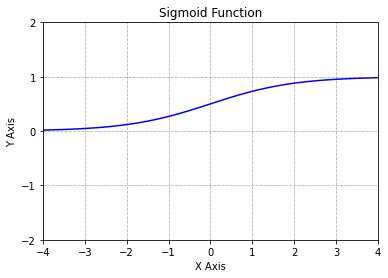

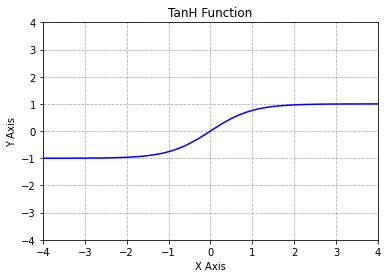

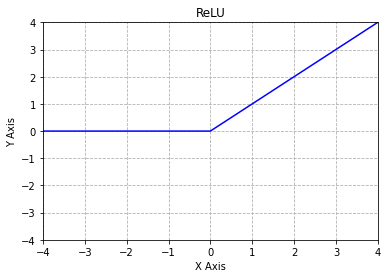

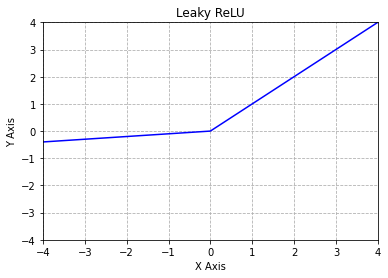

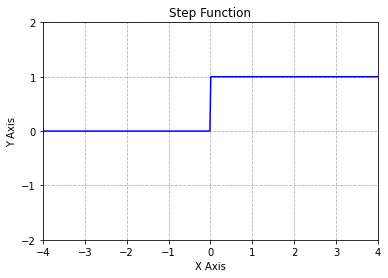

done


In [142]:
import numpy as np 
import matplotlib.pyplot as plt

##### Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

##### TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

##### ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

##### Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()


##### Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')

### 13 - Feed-Forward Neural Network

用经典的 MNIST Dataset, 

In [145]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [147]:
# Device configuration
# 这样能保证用正确的 CPU 或者 GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10 # 因为是 digit from 0-9 所以  10 different classes
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [152]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, #说明这个是 training dataset
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
#  len(train_loader) 有 600, 然后我 batch size 是 100 那么总共有 60,000 个 sample
# "has a training set of 60,000 examples, and a test set of 10,000 examples."
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) # for evaluatoin shuffle doesn't matter

examples = iter(test_loader) # convert it to iterator so we can view items
samples, labels = examples.next()

print(samples.shape, labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100])
# print 出来是上面这个。 100 是 100 row from this batch, 1 是 1 channel? 哦，其实就是 黑白的 binary， 
# 然后后面是 28x28 pixel， 每个 pixel 是表示的黑白值



torch.Size([100, 1, 28, 28]) torch.Size([100])


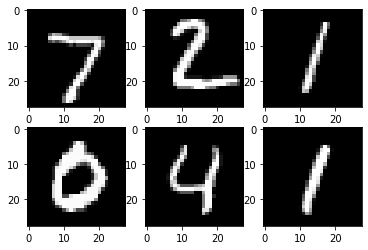

In [153]:

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()


In [155]:

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__() #先 call super init
        self.input_size = input_size
        # 这边就是 linear + ReLu + Linear 这样
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  # 这边要用 hidden size
        
    
    def forward(self, x):
        # 这边就是把 input 到 output 一层层传过去
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        # 这个就是上面说的，因为我们的 cross-entropy loss func 里面有 softmax
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [156]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() # 不知道他为啥老是把 loss func 叫做 criterion

# Adam 是啥？之前 binary classification 不是用的gradient descent??
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [164]:
# Train the model
# 为啥需要 total step? 那么 num_epochs 是啥？
# 哦， epoch 是我 gradient descent 试几次，然后 n_total_steps 是我的 training data 有多少 row
n_total_steps = len(train_loader)

# epoch = 2 也就是我们对每个 picture set总共跑两次，也就是 gradient descent 只试两次？
for epoch in range(2):
    # 这里因为是 data loader read by batch， 我每次 从 train_loader 里面读出来就已经是 100 个sample 了
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        # 这里为啥要 reshape??? 为了方便？哦，是因为你上面 最早 param 设置了 input_size = 784 # 28x28
        # -1 是因为 automatically 帮你算，根据你另一个input
        images = images.reshape(-1, 28*28).to(device) # to(device) 是 push to GPU if available
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize

        loss.backward()
        optimizer.step()
        
        optimizer.zero_grad() #这个不是一般写在后面?        
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.0026
Epoch [1/2], Step [200/600], Loss: 0.0014
Epoch [1/2], Step [300/600], Loss: 0.0135
Epoch [1/2], Step [400/600], Loss: 0.0258
Epoch [1/2], Step [500/600], Loss: 0.0208
Epoch [1/2], Step [600/600], Loss: 0.0152
Epoch [2/2], Step [100/600], Loss: 0.0100
Epoch [2/2], Step [200/600], Loss: 0.0059
Epoch [2/2], Step [300/600], Loss: 0.0122
Epoch [2/2], Step [400/600], Loss: 0.0108
Epoch [2/2], Step [500/600], Loss: 0.0040
Epoch [2/2], Step [600/600], Loss: 0.0704
Epoch [3/2], Step [100/600], Loss: 0.0118
Epoch [3/2], Step [200/600], Loss: 0.0033
Epoch [3/2], Step [300/600], Loss: 0.0054
Epoch [3/2], Step [400/600], Loss: 0.0216
Epoch [3/2], Step [500/600], Loss: 0.0021
Epoch [3/2], Step [600/600], Loss: 0.0016
Epoch [4/2], Step [100/600], Loss: 0.0017
Epoch [4/2], Step [200/600], Loss: 0.0003
Epoch [4/2], Step [300/600], Loss: 0.0145
Epoch [4/2], Step [400/600], Loss: 0.0049
Epoch [4/2], Step [500/600], Loss: 0.0079
Epoch [4/2], Step [600/600], Loss:

In [168]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # 这里也不用加 softmax?? 好神奇，cross entropy 里面有，这里没有呀？？
        outputs = model(images)
        
        # max returns (value ,index)
        # 回顾一下, torch.max 是 multi-class classifier 的拿值的办法
        # 哦，比如你 output 长这样 tensor([[ 0.6763,  0.7445, -2.2369]]), 然后我只要 0.7445 这个，
        # 就可以 call 这个 method， 然后返回 的 index 是 1， 那么如果这里你只判断 0,1,2 那么 index 就是你的 prediction 了
        # 不然其他情况下，还要  index -> label value 转化
        _, predicted = torch.max(outputs.data, 1)
        
        # print(f'labels: {labels}')
        # print 了一下， 为啥每个 label 的长度是 100? label 不是应该是一个数？
        # 哦哦，不是，因为我这里 pytorch data loader 是 load by batch, 我上你们设了 batch size 是 100
        # 所以我iterate test_loader 其实是 100 个 100 个 data sample 去evaluate
        # 所以这里 n_sample 和 n_correct 都要累加，这个就 make sense 了
        n_samples += labels.size(0)
        
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

labels: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
labels: tensor([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6,
        7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2,
        0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7,
        2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3,
        1, 6, 4, 2])
labels: tensor([3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7,
        1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4,
        4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0,
        1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4

labels: tensor([5, 4, 4, 0, 4, 3, 9, 7, 3, 1, 0, 1, 2, 5, 9, 2, 1, 0, 1, 8, 9, 1, 6, 8,
        3, 8, 9, 3, 6, 2, 8, 3, 2, 2, 1, 0, 4, 2, 9, 2, 4, 3, 7, 9, 1, 5, 2, 4,
        9, 0, 3, 8, 5, 3, 6, 0, 9, 4, 6, 2, 5, 0, 2, 7, 4, 6, 6, 8, 6, 6, 8, 6,
        9, 1, 7, 2, 5, 9, 9, 0, 7, 2, 7, 6, 7, 0, 6, 5, 2, 4, 7, 2, 0, 9, 9, 2,
        2, 9, 4, 4])
labels: tensor([2, 3, 3, 2, 1, 7, 0, 7, 6, 4, 1, 3, 8, 7, 4, 5, 9, 2, 5, 1, 8, 7, 3, 7,
        1, 5, 5, 0, 9, 1, 4, 0, 6, 3, 3, 6, 0, 4, 9, 7, 5, 1, 6, 8, 9, 5, 5, 7,
        9, 3, 8, 3, 8, 1, 5, 3, 5, 0, 5, 5, 3, 8, 6, 7, 7, 7, 3, 7, 0, 5, 9, 0,
        2, 5, 5, 3, 1, 7, 7, 8, 6, 5, 9, 3, 8, 9, 5, 3, 7, 9, 1, 7, 0, 0, 3, 7,
        2, 5, 8, 1])
labels: tensor([8, 6, 2, 9, 5, 7, 5, 7, 8, 6, 2, 5, 1, 4, 8, 4, 5, 8, 3, 0, 6, 2, 7, 3,
        3, 2, 1, 0, 7, 3, 4, 0, 3, 9, 3, 2, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3,
        9, 0, 8, 6, 2, 5, 6, 1, 0, 0, 4, 4, 0, 1, 2, 3, 2, 7, 7, 8, 5, 2, 5, 7,
        6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 3, 9, 5, 0

labels: tensor([9, 4, 5, 8, 4, 2, 9, 7, 0, 0, 7, 5, 1, 1, 7, 6, 6, 6, 8, 2, 2, 7, 7, 4,
        0, 2, 4, 2, 1, 8, 9, 6, 1, 0, 5, 9, 6, 9, 8, 0, 3, 0, 8, 3, 9, 6, 3, 0,
        1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 5, 4, 8, 7, 4, 7, 7, 3, 9, 8, 8, 3, 1, 5, 8, 2, 7, 4, 2, 1, 5, 4,
        5, 5, 8, 6])
labels: tensor([4, 4, 4, 1, 8, 7, 5, 5, 1, 8, 9, 1, 3, 6, 3, 3, 2, 2, 6, 9, 9, 6, 5, 5,
        3, 3, 8, 1, 6, 5, 6, 8, 1, 9, 7, 6, 8, 3, 7, 4, 7, 0, 9, 0, 0, 3, 7, 9,
        3, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 4, 7, 9, 6, 2, 6, 2, 2, 9, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9])
labels: tensor([8, 0, 5, 6, 6, 0, 8, 0, 2, 3, 7, 9, 4, 7, 1, 9, 1, 7, 1, 4, 0, 0, 4, 1,
        7, 5, 7, 1, 3, 3, 3, 1, 6, 9, 7, 4, 3, 0, 2, 5, 2, 6, 0, 8, 9, 4, 3, 5,
        4, 8, 1, 5, 9, 0, 6, 4, 3, 6, 3, 3, 8, 1, 4, 7, 5, 7, 2, 2, 0, 0, 1, 7,
        7, 9, 5, 9, 8, 9, 6, 8, 8, 2, 3, 6, 1, 2, 9, 8

labels: tensor([8, 3, 8, 6, 7, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 7, 2, 6, 5, 5, 3, 7, 8, 6, 6,
        6, 6, 4, 3, 8, 8, 3, 0, 1, 9, 0, 5, 4, 1, 9, 1, 2, 7, 0, 1, 3, 8, 2, 9,
        2, 7, 4, 2, 6, 5, 5, 9, 9, 1, 1, 5, 7, 6, 8, 2, 9, 4, 3, 1, 9, 0, 9, 3,
        6, 8, 7, 0])
labels: tensor([1, 0, 5, 8, 2, 7, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 8,
        9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 1, 2, 1, 3, 9, 9, 8, 5, 3, 7, 0, 7,
        7, 5, 7, 9, 9, 4, 7, 0, 3, 4, 1, 5, 8, 1, 4, 8, 4, 1, 8, 6, 6, 4, 6, 0,
        5, 5, 3, 3, 5, 7, 2, 5, 9, 6, 9, 2, 6, 2, 1, 2, 0, 8, 3, 8, 3, 0, 8, 7,
        4, 9, 5, 0])
labels: tensor([9, 7, 0, 0, 4, 6, 0, 9, 1, 6, 2, 7, 6, 8, 3, 5, 2, 1, 8, 3, 8, 6, 1, 0,
        2, 1, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 6, 4, 7, 6, 2, 3, 4, 8, 7, 8, 6, 9, 8, 3,
        2, 2, 8, 4, 8, 5, 6, 5, 0, 2, 0, 1, 1, 2, 9, 6

### 14 - Convolutional Neural Network (CNN)


In [169]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001



# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


images.shape: torch.Size([4, 3, 32, 32]), labels.shape: torch.Size([4])


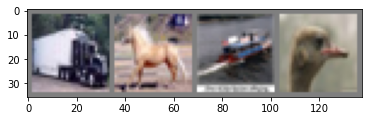

In [173]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# check image shape
print(f'images.shape: {images.shape}, labels.shape: {labels.shape}')

# 4: batch size,  3: pixel channel size (三原色)， 32 x 32: pixel grid size
# torch.Size([4, 3, 32, 32]), labels.shape: torch.Size([4])

# show images
imshow(torchvision.utils.make_grid(images))

In [179]:
# 这边是去算 image grid size after each layer

# 5 这里是 kernal size 也叫 filter size, 参考下面图
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6, 16, 5)

print(f'images.shape {images.shape}')

x = conv1(images)

print(f'after conv1 {x.shape}')

x = pool(x)

print(f'after pool {x.shape}')


x = conv2(x)

print(f'after conv2 {x.shape}')

x = pool(x)

print(f'after pool2 {x.shape}')

images.shape torch.Size([4, 3, 32, 32])
after conv1 torch.Size([4, 6, 28, 28])
after pool torch.Size([4, 6, 14, 14])
after conv2 torch.Size([4, 16, 10, 10])
after pool2 torch.Size([4, 16, 5, 5])


- W 是 Width 对应上面是 32
- F 是 filter size 对应上面 kernal size 是 5
- P 是 padding size 我们没有，所以是 0
- S 是 stride size 我们这里 conv1 没有设置，所以 default 是 1

所以是 (32-5 + 0)/1 + 1 = 28  所以你看到第二个是 28 x 28 grid

然后在看 pool 后面, (28 - 2 + 0)/2 + 1 = 14 所以你看到 max pool 出来 14 x 14, 其实就是减半

同理， conv2 之后, (14 - 5 + 0)/1 + 1 =  10 

<img src="img/cnn1.png" width=400 height=400 />

In [180]:

# 感觉这里的一个写法就是 __init__ 里面写有哪些 layer component
# __forward__ 里写怎么把这些 layer 连起来
class ConvNet(nn.Module):
    def __init__(self):
        # don't forget to call super

        super(ConvNet, self).__init__()
        # 3: input channel 因为 picture 三原色
        # 6: output channel 为啥？6? hidden layer 估计？
        # 5: kernal size? 啥？
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # kernal size = 2, stride is 2 (就是每次 slide pixel by two)
        self.pool = nn.MaxPool2d(2, 2)
        
        # input channel size equals the last output channel size
        # 16 和 5 怎么来的不知道?
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        
        # 下面这3个 fc 都是 fully connected layer, 至于 flatten， 那个是在 forward 里， x.view(-1, 16 * 5 * 5) reshape
        # 16 * 5 * 5?? what??  哦， 因为上面算出来，在第二个 pool 之后，我们的 dimension: 
        # after pool2 torch.Size([4, 16, 5, 5])
        # 这里 notice that 我们第二个 pool 没写在 init 里面，因为 init 只是 init layer
        # 然后 forward 是把它们连起来，所以我们不用 max pool 写两遍
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        #
        self.fc2 = nn.Linear(120, 84)
        
        # 这边 output 10 channel 个因为 multi-class 有 10 类
        # 为什么要 fc3 不是下图只有两个 linear??
        self.fc3 = nn.Linear(84, 10)

    # 这边就是根据下图，把 layer 连起来    
    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        # use x.view to flatten output from prev layer
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x



- flatten: flatten 3d tensor into 1d tensor, 

<img src="img/cnn2.png" width=800 height=800 />

In [181]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
# 这边为啥用 SDG 不用 ADAM, 我们上一课不是用 ADAM
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 这里就是跟之前第13课的 feed forward NN 的 training loop 一样
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels) # use loss func to compute loss

        # Backward and optimize
        loss.backward() # compute gradient by using backward propagation after loss computed
        optimizer.step() # use gradient descent to update weights (optimizer)

        # 发现这里 用 gradient descent update weight 不是积累了一个 epoch update 一次，而是一个 batch of training data (比如 100 sample) 就可以update 一次!
        
        optimizer.zero_grad() # clear out 一下，因为你 已经用你积累的 loss 算出 gradient (derivative) 了，而且 update 了你的 weight, 那么就要清空 gradient，然后下一个 batch 重新积攒一波

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/5], Step [2000/12500], Loss: 2.2941
Epoch [1/5], Step [4000/12500], Loss: 2.2848
Epoch [1/5], Step [6000/12500], Loss: 2.3426
Epoch [1/5], Step [8000/12500], Loss: 2.2780
Epoch [1/5], Step [10000/12500], Loss: 2.2421
Epoch [1/5], Step [12000/12500], Loss: 2.1423
Epoch [2/5], Step [2000/12500], Loss: 2.1351
Epoch [2/5], Step [4000/12500], Loss: 1.7072
Epoch [2/5], Step [6000/12500], Loss: 1.8495
Epoch [2/5], Step [8000/12500], Loss: 1.2267
Epoch [2/5], Step [10000/12500], Loss: 1.6662
Epoch [2/5], Step [12000/12500], Loss: 1.8128
Epoch [3/5], Step [2000/12500], Loss: 3.0051
Epoch [3/5], Step [4000/12500], Loss: 1.9093
Epoch [3/5], Step [6000/12500], Loss: 2.1882
Epoch [3/5], Step [8000/12500], Loss: 1.8935
Epoch [3/5], Step [10000/12500], Loss: 1.4031
Epoch [3/5], Step [12000/12500], Loss: 1.3535
Epoch [4/5], Step [2000/12500], Loss: 1.0531
Epoch [4/5], Step [4000/12500], Loss: 1.3017
Epoch [4/5], Step [6000/12500], Loss: 1.3017
Epoch [4/5], Step [8000/12500], Loss: 1.2959
Epoc

In [182]:
# 这边跟第 13 课 Feedforward NN 的 evaluation 部分差不多
# Question: 根据 第 17 课，这里为什么不用 model.eval() 设置一下？是不是漏了??
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # max returns (value ,index)
        # 之前讲过，选 multiclass prediction rate 最高的那个的 index 就是你的 prediction
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        # 这是啥？哦，因为要 print 后面每个 class 的 accuracy 所以这里就每一个都过一下算一下
        # 因为上面的 Torch API 是直接帮你整个算了
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



Accuracy of the network: 47.91 %
Accuracy of plane: 40.2 %
Accuracy of car: 51.5 %
Accuracy of bird: 28.1 %
Accuracy of cat: 34.5 %
Accuracy of deer: 29.1 %
Accuracy of dog: 33.0 %
Accuracy of frog: 75.7 %
Accuracy of horse: 56.5 %
Accuracy of ship: 63.1 %
Accuracy of truck: 67.4 %


### 15 - Transfer Learning

In [185]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler # to change the learning rate
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

# 这个define dataloader 的 transform 要做什么
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [193]:
# 这个是我们自己下载的数据
data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), 
                                          data_transforms[x]) for x in ['train', 'val']
                 }

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                              batch_size=4,
                                              shuffle=True, num_workers=0) for x in ['train', 'val']
              }

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(class_names)

print(dataset_sizes)

['ants', 'bees']
{'train': 244, 'val': 153}


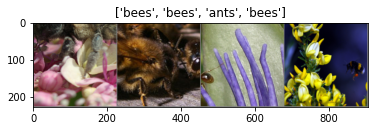

In [188]:



def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# 这里就是我们之前熟悉的 training loop? 
# 但是他这里的写法， 也包括 validation,
# 这里 training and eval 混在一个 method 写， 看起来好乱
# 哦哦，其实还好，validation 这里不是 evaluation, 而是我每个 epoch, 我都去 拿 epoch_acc 跟我 best_acc 比一下
# 然后如果更好，我就 best_model_wts = copy.deepcopy(model.state_dict()), 所以本质上就是 fine tune
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() #她这记录了一下 compute time, 因为后面要对比 option1 和 option2 transfer learning

    # deep copy 因为是 transfer learning from pretrained model 然后用这个weights 作为 starting point?
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10) # print 10 个小点： ----------

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                # 如果是 training phase 那么久 enable gradient descent accumulation
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs) 
                    # 这个应该是 validation 才要用吧，
                    _, preds = torch.max(outputs, 1) 
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                # 把每个 batch 的 loss and accurate count 算一下
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                # 这里就是 learn rate schuedule adjust step at the end of each epoch
                scheduler.step()

            # 这个好像就是 print 用    
            epoch_loss = running_loss / dataset_sizes[phase]

            # 这个 print 要用， 然后下面决定要不要 update model weights after each epoch 的时候，也要用
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            # val 是指 validation, 这里就是 validation 的时候，如果 current epoch_acc > best_acc
            # 那么我们就 deepcopy new model weights from this epoch to best_model_weights
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


__Option1__: Finetuning the convnet. Load a pretrained model and reset final fully connected layer。 we train the model again but only for a litte bit (less epoch) so we fine tune all the weights based on the new training and validation data, and with the new last layer (Linear Layer?)

In [190]:

#### Finetuning the convnet ####

model = models.resnet18(pretrained=True)

# get num of features from last layer
num_ftrs = model.fc.in_features

# here we create a new layer
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)


# This will update the learning rate?? for what?? 哦，下面这个有解释，就是 decay learning 
# rate every 7 epoch 好吧， 这样更灵活一些？
# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# call the training loop we defined above
# this technique is call fined tuning
model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=3)



Epoch 0/2
----------
train Loss: 0.7055 Acc: 0.5082
val Loss: 0.5331 Acc: 0.6797

Epoch 1/2
----------
train Loss: 0.5540 Acc: 0.7131
val Loss: 0.3714 Acc: 0.9150

Epoch 2/2
----------
train Loss: 0.5127 Acc: 0.7459
val Loss: 0.3087 Acc: 0.9477

Training complete in 5m 42s
Best val Acc: 0.947712


__Option2__: 这个是另一个做法 （上一个叫做 fine tuning). 这个是 freeze parameter 做法. We freeze all the layers's weights in the beginning , and only train the last layer, 就是 linear 的部分 (那确实是会快很多)

发现这个方法快好多: 
- option1: 5m 42s
- option2: 2m 29s

In [194]:


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = models.resnet18(pretrained=True)

# 这个跟 option1 啥区别？就多了这一步？？ 哦，是的，因为 option2 就是把之前的 layer 的 weights 都 freeze
# 然后 last layer 也就是 linear layer 给 swap 成新的 nn.Linear 然后， 只train 这个 layer
for param in model_conv.parameters():
    param.requires_grad = False # this will freeze all the layer from the beginning

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=3)


/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/2
----------
train Loss: 0.7888 Acc: 0.6311
val Loss: 0.2163 Acc: 0.9346

Epoch 1/2
----------
train Loss: 0.4970 Acc: 0.7705
val Loss: 0.2245 Acc: 0.9216

Epoch 2/2
----------
train Loss: 0.4817 Acc: 0.7746
val Loss: 0.3208 Acc: 0.8889

Training complete in 2m 28s
Best val Acc: 0.934641


### 16 - How To Use The TensorBoard

(问了下，陈学长说不怎么用？那么就先跳过？）


### 17 - Saving and Loading Models


Only 3 method you will need to remember
- torch.save(arg, path) # basically uses pickle serializer
- torch.load(path)
- model.load_state_dict(arg)

2 DIFFERENT WAYS OF SAVING (下面这个只是例子，不用跑也不能跑)


In [ ]:
# Option 1) lazy way: save whole model
# 缺点是 serialized data is bond to class and exactly directory structure when model is saved
torch.save(model, PATH)

# model class must be defined somewhere
model = torch.load(PATH)
model.eval() 

__important:__

Remember that __you must call model.eval()__ to set dropout and batch normalization layers 
to evaluation mode before running inference. 

Failing to do this will yield inconsistent inference results. 

If you wish to resuming training, call model.train() to ensure these layers are in training mode.

In [ ]:
# Option2 是 preferred way!! 因为你直接 load parameter 就行, 但是说只能 做 inference?? 
# 应该也可以 train 吧，只是要turn on training mode? 不然你之前 transfer learning 咋弄

# Option2 2) recommended way: save only the state_dict for inference later
torch.save(model.state_dict(), PATH)
# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))

# 这个应该是 set the model to evaluation mode 这样我们可以 直接 load 完之后 infernece 
# 这边说可以跟 with torch.no_grad(): 一起用。之前的 tutorial 好像就是直接用 with torch.no_grad():
# https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch
model.eval()

In [195]:
# 先随便define 一个 model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.3137, -0.0960, -0.0775, -0.1689, -0.0393, -0.1313]],
       requires_grad=True)
Parameter containing:
tensor([-0.2228], requires_grad=True)


In [196]:
# 这个是上面说的Option 1

# save and load entire model
FILE = "model.pth" # root path 文件名就是 model.pth
torch.save(model, FILE)

In [197]:
# load the model
loaded_model = torch.load(FILE)
loaded_model.eval() # set the model to evaluation mode 

# inspect parameters
for param in loaded_model.parameters():
    print(param)

Parameter containing:
tensor([[-0.3137, -0.0960, -0.0775, -0.1689, -0.0393, -0.1313]],
       requires_grad=True)
Parameter containing:
tensor([-0.2228], requires_grad=True)


In [198]:
# 这个是上面说的 Option2, prefered method
# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

# print saved model
print(model.state_dict())

# To load model
# first define a model
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

# print loaded
print(loaded_model.state_dict())


OrderedDict([('linear.weight', tensor([[-0.3137, -0.0960, -0.0775, -0.1689, -0.0393, -0.1313]])), ('linear.bias', tensor([-0.2228]))])
OrderedDict([('linear.weight', tensor([[-0.3137, -0.0960, -0.0775, -0.1689, -0.0393, -0.1313]])), ('linear.bias', tensor([-0.2228]))])


__save and load checkpoint__

In [200]:

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 这里是我们的 checkpoint dict structure
checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())

# if we want to stop somewhere during training and save a checkpoint
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'params': [0, 1]}]}


In [201]:
# create 一个 model 然后我们就可以把上面存的 checkpoint 接着用
model = Model(n_input_features=6)
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

# 这里就是把之前的 checkpoint 的 state 给 load 出来， 然后把我们 saved 的 parameters
# assign 给我们上你们 create 的 model
checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or - 或者可以 continue 我们的 training
# model.train()

print(optimizer.state_dict())


{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'params': [0, 1]}]}


In [ ]:
# 下面是讲如果是用 GPU 咋办，比如 save on GPU and load on CPU

""" SAVING ON GPU/CPU    

# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""



__17 课正课终于看完了，给自己一个 pat pat on the shoulder 把 😄__

In [1]:
# ..................
# me trying out embedding
import torch
import torch.nn as nn

In [4]:
embedding = nn.Embedding(10, 3)
# basically a matrix of size 10 x 3
print(embedding.weight)

Parameter containing:
tensor([[ 0.1021, -1.2730, -1.1568],
        [ 1.1617,  0.4782, -0.1367],
        [ 0.9742, -0.6944,  0.4010],
        [-0.4917,  0.4499, -0.2988],
        [ 0.3365, -1.6268,  2.4407],
        [ 1.0346,  1.5760,  0.9806],
        [ 0.6846,  0.6742, -0.5222],
        [ 0.2689,  0.1099,  0.9766],
        [-0.9309,  0.6989,  0.3532],
        [ 0.0284,  0.2298,  0.9384]], requires_grad=True)


In [7]:
# # a batch of 2 samples of 4 indices each
# 哦，尼玛，这里就是返回 index, 比如 [1,2,4,5] 就是我要 weight matrix 里面
# index at 1,2,4,5 的 那几个 row... 所以input 就是 lookup index ..

# ref: 这个讲的最清楚 https://stackoverflow.com/questions/65445174/what-is-the-difference-between-an-embedding-layer-with-a-bias-immediately-afterw
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])

“Here we can multiply a one-hot vector with an embedding matrix which makes the lookup for the problem. Backpropagation is also done well with embedding matrix.”

In [6]:
# 这尼玛咋算的? 肯定不是 weight matrix ✖️的? (上面回答了)
embedding(input)

tensor([[[ 1.1617,  0.4782, -0.1367],
         [ 0.9742, -0.6944,  0.4010],
         [ 0.3365, -1.6268,  2.4407],
         [ 1.0346,  1.5760,  0.9806]],

        [[ 0.3365, -1.6268,  2.4407],
         [-0.4917,  0.4499, -0.2988],
         [ 0.9742, -0.6944,  0.4010],
         [ 0.0284,  0.2298,  0.9384]]], grad_fn=<EmbeddingBackward0>)

In [ ]:
# 诶.. 那这个 lookup table有啥用? ?
# 我觉得这个 tutorial 讲的最好: https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html
# 这里 word embedding 跟 letter 无关
# 他这里是这样，一个 paragraph 把它分成 word sets, 然后每个 word 有一个对应的 index
# 我们的 input 比如按照 N-Gram 做法，是一个 sequence of words, 但是我们需要用 sequence of index
# 来表达，但是我们又希望每一个 index 都是对于一个 word 然后对应一个 word embedding vector， 所以 nn.embedding 就是做这个

In [ ]:
# 咱们来看一下这个 word2vec 代码

class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        # embedding_dim 就是我们每个 word 需要用 1 x embedding_dim 的 vector 来表达
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        # Question: context_size 是啥？
        # Answer 就是 n-gram 的 window size of sequence of words
        # 因为 你看之前例子, [1,2,4,5] input 会返回 4 x embedding_dim 的 matrix
        # 也就是这个 window sequence 里面每个 word 对应的index
        # 然后你看下面 forward 里面有个 self.embeddings(inputs).view((1, -1) 就是 reshape
        # 把这个 4 x embedding_dim  matrix 变成 1 x (4*embedding_dim) 的 vector 然后给
        # linear layer. 这个一个 forward path， 你最后就能 train 到 每个 embedding vector
        # 对应的是每个 word set 里面每个 index 的 word 的 embedding representation/vector
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs